A* Tree Planner Demo Notebook

In [1]:
# ============================================================================
# CELL 1: Imports
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import datetime as dt

from env.balloon_env import BalloonERAEnvironment
from agent.tree_search_agent import run_astar

# For visualization
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Configuration parameters
use_simplified_step = True  # Use simplified step for A* search
lat_long_atol = 1e-1        # Tolerance for latitude and longitude (degrees)
alt_atol = 1                # Tolerance for altitude (km)
environment_step = 6000     # Environment step in seconds

In [3]:
# ============================================================================
# CELL 2: Demo Setup
# ============================================================================

# Demo Setup
# Ithaca to TODO, no noise in wind field.
np.random.seed(0)  # For reproducible results

# BalloonERAEnvironment initialization 
# 1. load your ERA5 file
ds = xr.open_dataset("era5_data.nc", engine="netcdf4")
# 2. pick a reference start_time (should match your dataset’s first valid_time)
start_time = dt.datetime(2024, 7, 1, 0, 0)
# Create environment and agent
env = BalloonERAEnvironment(ds=ds, start_time=start_time, viz=False, add_noise=False, dt=environment_step)
initial_state = env.get_balloon_state()  # Get the initial state of the balloon


WindField initialized with noise enabled: False


In [ ]:
# Define start and target states

# Working start state and target state (0/0/10 pair)
# start_state = np.array([0.0, 0.0, 10.0])  # lat, lon, alt
# target_state = np.array([-0.0001, 0.035, 10.0])  # lat, lon, alt

# ITHACA. working start/end target states
start_state = np.array([42.6, -76.5, 10.0])  # lat, lon, alt
## Working target (dt=60)
# target_state = np.array([42.62, -76.5, 10.0])  # lat, lon, alt
## Working target (dt=6000)
target_state = np.array([46.75, -77.5, 20])  # lat, lon, alt

print(f"Start State:  Lat={start_state[0]:.3f}, Lon={start_state[1]:.3f}, Alt={start_state[2]:.1f} km")
print(f"Target State: Lat={target_state[0]:.3f}, Lon={target_state[1]:.3f}, Alt={target_state[2]:.1f} km")


Start State:  Lat=42.600, Lon=-76.500, Alt=10.0 km
Target State: Lat=46.750, Lon=-77.500, Alt=20.0 km


=== Tree Search (A*) Demo ===
Searching for optimal path...
Iteration 1/1000
Iteration 2/1000
Iteration 3/1000
Iteration 4/1000
Iteration 5/1000
Iteration 6/1000
Iteration 7/1000
Iteration 8/1000
Iteration 9/1000
Iteration 10/1000
Iteration 11/1000
Iteration 12/1000
Iteration 13/1000
Iteration 14/1000
Iteration 15/1000
Iteration 16/1000
Iteration 17/1000
Iteration 18/1000
Iteration 19/1000
Iteration 20/1000
Iteration 21/1000
Iteration 22/1000
Iteration 23/1000
Iteration 24/1000
Iteration 25/1000
Iteration 26/1000
Iteration 27/1000
Iteration 28/1000
Iteration 29/1000
Iteration 30/1000
Iteration 31/1000
Iteration 32/1000
Iteration 33/1000
Iteration 34/1000
Iteration 35/1000
Iteration 36/1000
Iteration 37/1000
Iteration 38/1000
Iteration 39/1000
Iteration 40/1000
Iteration 41/1000
Iteration 42/1000
Iteration 43/1000
Iteration 44/1000
Iteration 45/1000
Iteration 46/1000
Iteration 47/1000
Iteration 48/1000
Iteration 49/1000
Iteration 50/1000
Iteration 51/1000
Iteration 52/1000
Iteration 53/

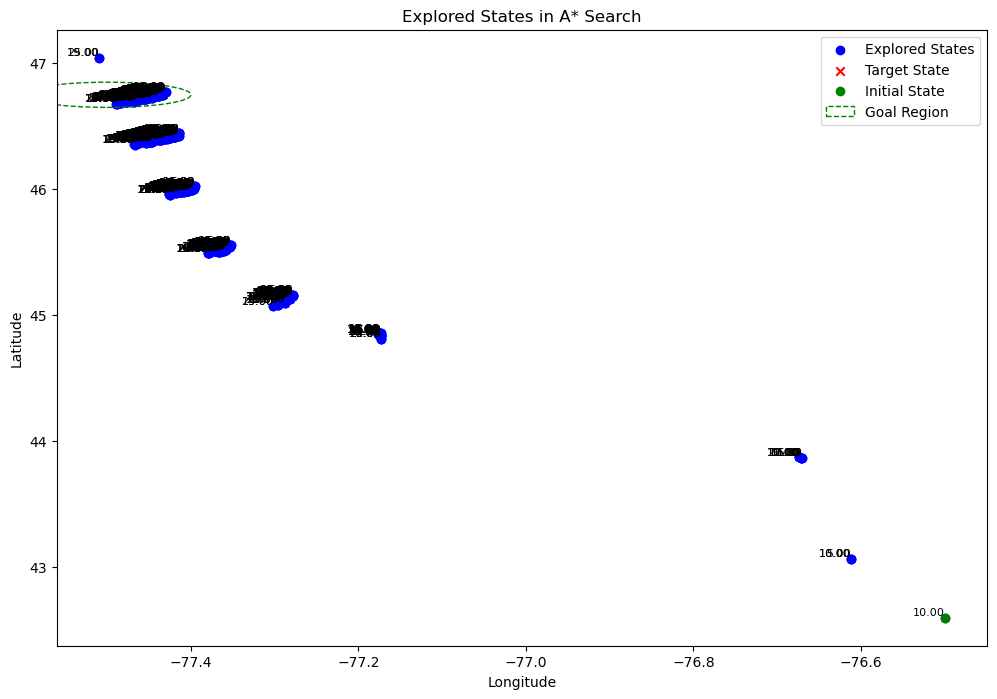

Action sequence to target: [((np.float64(42.6), np.float64(-76.5), np.float64(10.0), np.float64(0.0)), 'stay'), ((np.float64(43.068668967726246), np.float64(-76.61227571803865), np.float64(10.0), np.float64(1.6666666666666667)), 'descend'), ((np.float64(43.870035066614825), np.float64(-76.6712938711849), np.float64(5.0), np.float64(3.3333333333333335)), 'ascend'), ((np.float64(44.858201759353896), np.float64(-77.17480084167423), np.float64(11.0), np.float64(5.0)), 'ascend'), ((np.float64(45.15714475188131), np.float64(-77.28321411825277), np.float64(17.0), np.float64(6.666666666666667)), 'ascend'), ((np.float64(45.52915784968532), np.float64(-77.36656300107903), np.float64(23.0), np.float64(8.333333333333334)), 'ascend'), ((np.float64(45.96324651666778), np.float64(-77.42588140737573), np.float64(25.0), np.float64(10.0)), 'stay'), ((np.float64(46.35643587255447), np.float64(-77.46790023354126), np.float64(25.0), np.float64(11.666666666666666)), 'descend'), ((np.float64(46.6802662883082

<Figure size 1200x800 with 0 Axes>

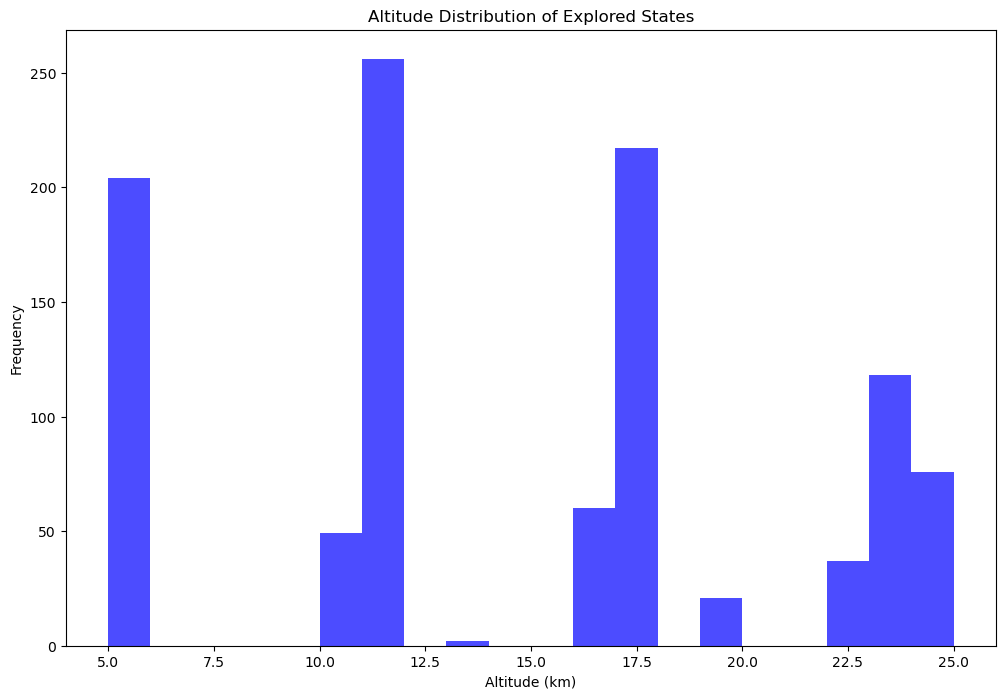

In [6]:
# ============================================================================
# CELL 9: Tree Search Demo
# ============================================================================

# Tree Search Demo
print("=== Tree Search (A*) Demo ===")

# Find optimal path
print("Searching for optimal path...")
# Reset the environment to the initial state
env.set_balloon_state(initial_state)
optimal_path = run_astar(env, initial_lat=start_state[0], initial_long=start_state[1], initial_alt=start_state[2],
            target_lat=target_state[0], target_lon=target_state[1], target_alt=target_state[2],
            distance='haversine', heuristic='haversine',
            plot_suffix="test_era_notebook", simplified_step=use_simplified_step,
            lat_long_atol=lat_long_atol, alt_atol=alt_atol)

if optimal_path:
    print(f"Found path with {len(optimal_path)} steps")
    print("Path:")
    for i, state in enumerate(optimal_path):
        print(f"  Step {i}: Lat={state[0][0]:.3f}, Lon={state[0][1]:.3f}, Alt={state[0][2]:.1f} km, Action={state[1]}")
else:
    print("No path found within iteration limit")